In [1]:
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11

In [3]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [4]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [6]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = .5,
                max_depth = 20, alpha = 10, n_estimators = 10)

In [7]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
y_pred

[21:42:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-74.52903 , -74.51708 , -74.24552 , -74.24552 , -74.938774,
       -76.62685 , -76.62685 , -75.84317 , -76.62685 , -76.62685 ,
       -76.62685 , -76.62685 , -75.84317 , -75.84317 , -76.62685 ,
       -76.62685 , -75.97    , -74.343605, -74.343605, -74.343605,
       -74.343605, -74.343605, -74.343605, -74.343605, -75.45321 ,
       -74.34871 , -74.08543 , -74.08543 , -74.08543 , -74.08543 ,
       -73.87649 , -73.87649 , -73.87649 , -73.613205, -73.613205,
       -73.613205, -73.87649 , -73.56646 , -73.87649 , -73.87649 ,
       -73.87649 , -73.613205, -73.613205, -73.613205, -73.95364 ,
       -73.87649 , -73.95364 , -73.95364 , -73.95364 , -73.95364 ,
       -73.95364 , -73.95364 , -73.95364 , -73.95364 , -73.69036 ,
       -74.38308 , -73.95364 , -74.38308 , -73.69036 , -74.38308 ,
       -74.38308 , -74.38308 , -73.95364 , -73.95364 , -75.45321 ,
       -75.61254 , -75.61254 , -74.03582 , -74.03582 , -74.112976,
       -74.112976, -74.39328 , -74.03582 , -74.03582 , -74.035

In [8]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.9079726541381232

In [9]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.529030
497,-74.181818,-74.517082
498,-74.090909,-74.245522
499,-74.181818,-74.245522
500,-75.000000,-74.938774
...,...,...
615,-70.363636,-73.953644
616,-70.181818,-73.953644
617,-70.454545,-73.953644
618,-70.363636,-73.953644


In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.5685164823560076
Mean Squared Error: 3.6403596489388743
Root Mean Squared Error: 1.9079726541381232


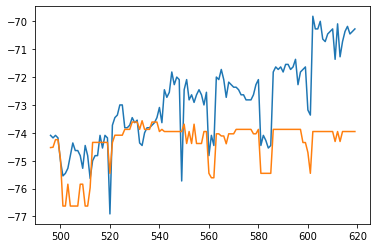

In [11]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()